In [2]:
import joblib
import numpy as np
import csv
from matplotlib import pyplot as plt
from scipy import signal
from utilities import cwt, paper_cwt

In [3]:
dir = "Data/clusterResults/NZClustering"
k=2
kmeans = joblib.load(f'./{dir}/kmeans.pkl{k}')
data_center = np.load(f'./{dir}/kmeansClusterCenters{k}.npz')
data_labels = np.load(f'./{dir}/kmeansClusterLabels{k}.npz')
print(kmeans)
print(data_labels.files)
centers = data_center["arr_0"]
labels = data_labels["arr_0"]
print(f'shape of centers {centers.shape}')
print(f'shape of labesl {labels.shape}')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


KMeans(n_clusters=2, n_init=10)
['arr_0']
shape of centers (2, 54)
shape of labesl (3704, 16730)


In [4]:
def read_csv(csv_filename):
    with open(csv_filename, newline='') as csvfile:
        csv_reader = csv.reader(csvfile)
        csvlist = [row for row in csv_reader]
    return csvlist

In [5]:
#training_day_two = o_labels[:,214585:429170]
#training_day_seven = o_labels[:,1287507:1502100]
def count_count_clusters(labels):
    two = np.count_nonzero(labels == 2)
    three = np.count_nonzero(labels == 3)
    one = np.count_nonzero(labels == 1)
    zero = np.count_nonzero(labels == 0)
    return zero, one, two, three
zero, one, two, three = count_count_clusters(labels)

#day_two_zero, day_two_one, day_two_two, day_two_three = count_count_clusters(training_day_two)
#d7_zero, d7_one, d7_two, d7_three = count_count_clusters(training_day_seven)
cluster_num = 1
car_counts = np.sum(labels == cluster_num, axis=1)
print(car_counts.shape)
print(f'entire training set zeros cluster members = {zero}, one cluster members {one}, two cluster members = {two} three cluster members ={three}')
#print(f'day two of training zeros cluster members = {day_two_zero}, one cluster members {day_two_one}, two cluster members = {day_two_two} three cluster members ={day_two_three}')
#print(f'day seven of training zeros cluster members = {d7_zero}, one cluster members {d7_one}, two cluster members = {d7_two} three cluster members ={d7_three}')


(3704,)
entire training set zeros cluster members = 58418183, one cluster members 3549737, two cluster members = 0 three cluster members =0


7327
3530
3704


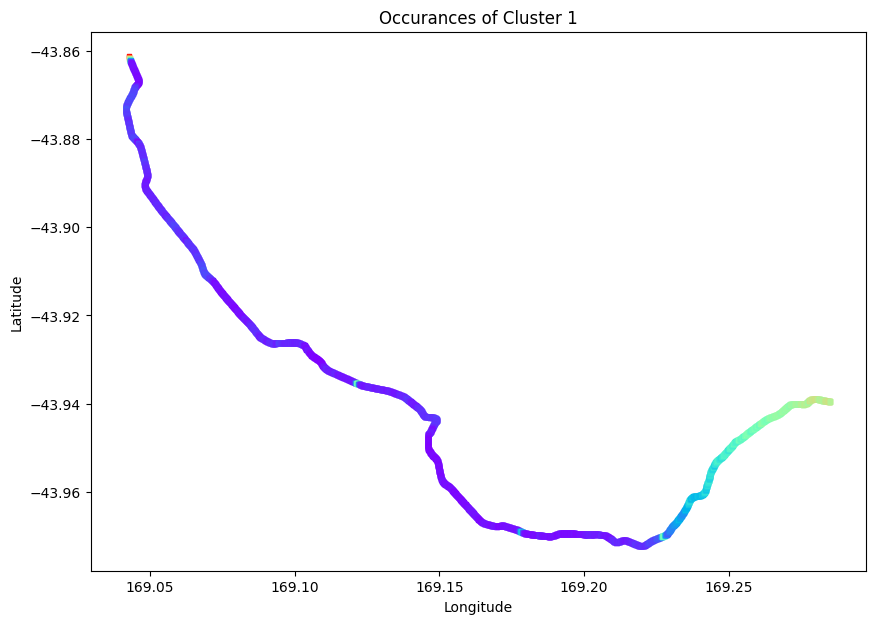

In [15]:
csvtmp = read_csv('./Data/SISSLE_south_array_20240327.csv')
print(len(csvtmp))
longitudes = np.asarray([float(csvtmp[i][2]) for i in range(1,len(csvtmp)) if csvtmp[i][2] !=''])[0:len(labels)*2:2]
latitudes = np.asarray([float(csvtmp[i][3]) for i in range(1,len(csvtmp)) if csvtmp[i][3] !=''])[0:len(labels)*2:2]
#TODO For some reason this csv is shorter than my labels 
print(len(longitudes))
print(len(labels))



normed_counts = car_counts / np.max(car_counts)

plt.figure(figsize=[10,7])
plt.scatter(latitudes, longitudes, marker='s', c=normed_counts[:len(longitudes)],  s=10, cmap="rainbow")

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Occurances of Cluster {cluster_num}')
plt.show()


In [4]:

DAS_1_dir_example = './DAS-1-Stanford-Campus/'

normed_counts = car_counts / np.max(car_counts)


csvtmp = read_csv('Stanford-1-Campus-geometry.csv')
longitudes = np.asarray([float(csvtmp[i][2]) for i in range(1,len(csvtmp))])
latitudes = np.asarray([float(csvtmp[i][3]) for i in range(1,len(csvtmp))])
longitudes = longitudes[15:301]
latitudes = latitudes[15:301]
ch_order = normed_counts
print(np.argmax(ch_order))

plt.figure(figsize=[10,7])
plt.scatter(longitudes, latitudes, marker='s', c=ch_order,  s=10, cmap="rainbow")

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title(f'Occurances of Cluster {cluster_num}')
plt.show()
print(latitudes[0])

NameError: name 'car_counts' is not defined

In [5]:
filepath = '20160905_06:17:54.npy'
second_filepath='20160905_06:19:54.npy'

car_DAS = np.load(filepath)
second_car_DAS = np.load(second_filepath)
print(car_DAS.shape)
print(car_DAS.max())
ten_min = np.concatenate((car_DAS, second_car_DAS), axis=1)
print(ten_min.shape)

def bpfilter(data, dt, bp_low, bp_high):
    '''
    Butterworth filter
    '''
    sos = signal.butter(6, [bp_low, bp_high], btype='bandpass', fs=1/dt, output='sos')
    return signal.sosfiltfilt(sos, data, axis=-1)

def DAS_preprocessing(data, dt, fl, fh):
    """this is important otherwise the plot doesn't look right 

    Args:
        data (_type_): _description_
        dt (_type_): _description_
        fl (_type_): _description_
        fh (_type_): _description_

    Returns:
        _type_: _description_
    """
    data = signal.detrend(data, axis=1)
    data = data - np.median(data, axis=0)
    data = bpfilter(data, dt, fl, fh)
    print(dt)
    return data






(286, 15000)
63630.109375
(286, 30000)


0.02
15.362286214105795
shape of data (286, 15000)


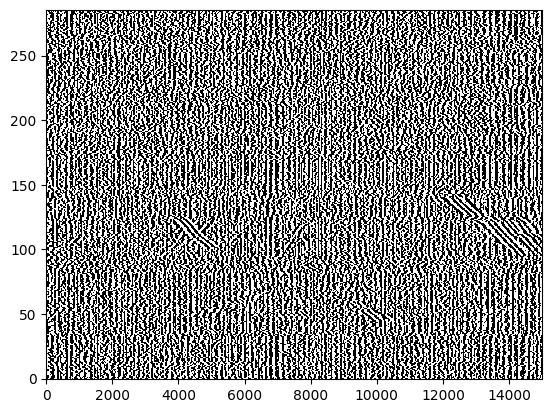

In [6]:

#cluster identified to be car data 
processed_data = DAS_preprocessing(car_DAS, .02, fl=0.2, fh = 24)
clim = processed_data.std() / 5e3
print(processed_data.max())
print("shape of data", car_DAS.shape)

plt.imshow(processed_data, vmin=-clim, vmax=clim, cmap='Greys', aspect='auto', origin='lower')


(286, 15000)
0.02


Text(0, 0.5, 'Channel Number ')

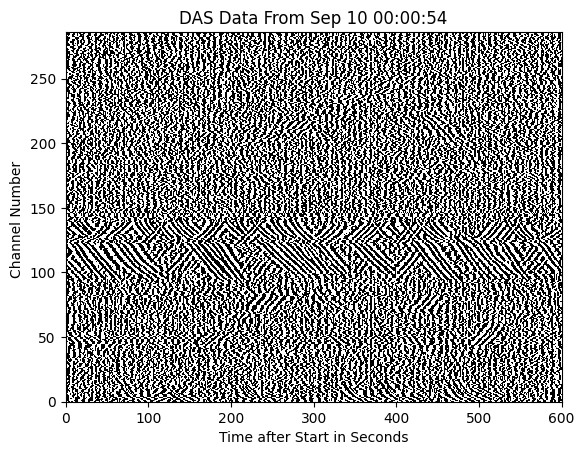

In [7]:

#Das sample with car noise from the standford paper 
september_file_path = "september10data/20160910_00:00:54.npy"
sep_data = np.load(september_file_path)

print(sep_data.shape)

proccesed_sep_data = DAS_preprocessing(sep_data, .02, fl=0.2, fh = 24)

clim = proccesed_sep_data.std() /5e3

seconds_shown = 600

plt.imshow(proccesed_sep_data, vmin=-clim, vmax=clim, extent=[0, seconds_shown,0, proccesed_sep_data.shape[0]], cmap='Greys', aspect='auto', origin='lower')
plt.title("DAS Data From Sep 10 00:00:54")
plt.xlabel("Time after Start in Seconds")
plt.ylabel("Channel Number ")



In [8]:
samples_per_second = 50
w0 = 8
dj=.5
minFrq = 0.2
maxFrq = 24
delta = 1/samples_per_second
n_samples = sep_data.shape[1]
freq_min_space= 0.04
freq_max_space= 2
nf = 30

ftime = np.logspace(np.log10(minFrq), np.log10(maxFrq), nf)



wf = "morlet"
w0 = 8

#scales from paper implementation 
#time_scales = paper_cwt.scales_from_fourier(ftime, wf , w0)
#scales from my implementation 
time_scales = cwt.get_scales(delta, dj, w0, n_samples)



space_log = np.logspace(np.log10(freq_min_space), np.log10(freq_max_space), 30)
#time_scales = scales
start_window = 0
end_window = 14950
window_length = 598
transform = cwt.transform_window(sep_data, 286, samples_per_second, 25, time_scales=time_scales, space_log=space_log,subsampling=False)

/Users/samgende/Documents/Bachelor/DAS-Unsupervised-Noise-Filtering/Code/utilities/cwt.py:60: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3641.)
  multiplied = wavelet.T * fft_signal[None,:,:]


KeyboardInterrupt: 

In [35]:
w0 = 8 
dt = 0.02
dj =.5
n_samples = len(sep_data)
scales = cwt.get_scales(dt, dj, w0, n_samples)


transform = cwt.cwt_time_vec(sep_data, scales, w0, dt)
transform.shape

torch.Size([26, 15000, 286])

In [36]:
permuted_transform = transform.permute(2, 1,0).real
print(permuted_transform.shape)
print(scales.shape)



torch.Size([286, 15000, 26])
(26,)


torch.Size([286, 15000, 26])


/var/folders/38/7n1_2vzs5yj4rjtfy6_m6d_00000gn/T/ipykernel_795/231716567.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


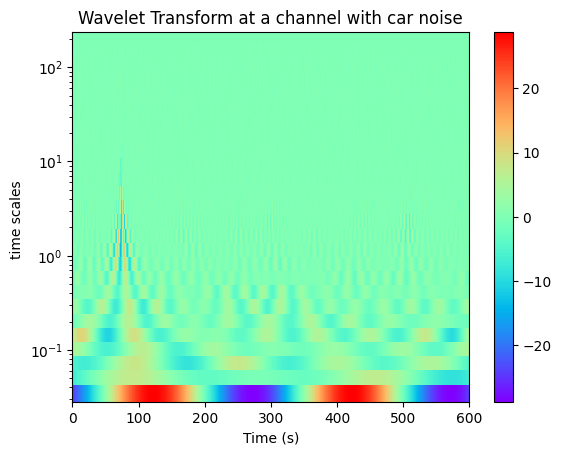

In [11]:
print(permuted_transform.shape)
time_line = np.linspace(0, 600, 15000)
fig, axs = plt.subplots()
display_transform = permuted_transform[115, :, :26]

pcm = axs.pcolormesh(time_line, scales[::-1], display_transform.T, shading="nearest", cmap="rainbow")
axs.set_yscale("log")
axs.set_xlabel("Time (s)")
axs.set_ylabel("time scales ")
axs.set_title("Wavelet Transform at a channel with car noise")
fig.colorbar(pcm, ax=axs)
fig.show()

In [32]:
#compute inverse with and withough mute 

mute = np.ones(scales.shape)
mute[:5] = 0.001
mute = scales * mute
print(mute.shape)
print(permuted_transform.shape)
inverse_with_mute = np.zeros((permuted_transform.shape[0], permuted_transform.shape[1]))
inverse = np.zeros((permuted_transform.shape[0], permuted_transform.shape[1]))
print(permuted_transform[0,:,:26].shape)

car_classified_count = 0
#loop over channels of transformed data 
for i in range(permuted_transform.shape[0]):
    inverse_with_mute[i, :] = cwt.inverse_cwt(permuted_transform[i,:,:26].T, mute, dj, delta, w0)
    inverse[i,:] = cwt.inverse_cwt(permuted_transform[i, :,:26].T, scales, dj, delta, w0)


    


(26,)
torch.Size([1, 15000, 26])
torch.Size([15000, 26])


(1, 15000)
[-0.44491001 -0.44815207 -0.44144767 ...  0.25123014  0.23686368
  0.26212611]
[-153.74667358 -153.74053955 -153.7479248  ... -153.20603943 -153.19837952
 -153.19032288]


Text(0.5, 1.0, 'Inverse cwt w High Frequency Mute')

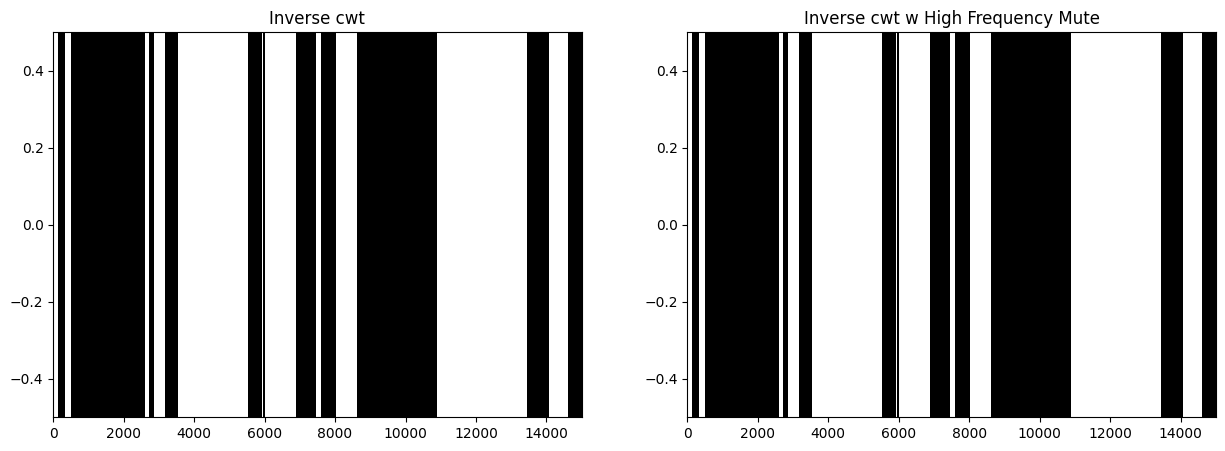

In [38]:
print(inverse.shape)
print(inverse[0])
print(car_DAS[0])

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

clim_inverse = inverse.std()/ 5e3


clim_muted = inverse_with_mute.std() / 5e3

axs[0].imshow(inverse, vmin=-clim_inverse, vmax=clim_inverse, cmap='Greys', aspect='auto', origin='lower')
axs[0].set_title("Inverse cwt")
axs[1].imshow(inverse_with_mute, vmin=-clim_muted, vmax=clim_muted, cmap='Greys', aspect='auto', origin='lower')
axs[1].set_title("Inverse cwt w High Frequency Mute")

In [31]:
def mute(transform_data, kmeans, mute_cluster):
    #define mute 
    counts = np.zeros(4)
    mute = np.ones(transform.shape[2])
    mute[:5] = 0.001
    for i in range(transform.shape[0]):
        for j in range(transform.shape[1]):
            features = np.array(transform[i,j], dtype=np.float64)[np.newaxis]
            pred = kmeans.predict(features)
            counts[pred] +=1
            if pred == mute_cluster:
                print(f'classifying features at {i}, {j} as car')
                transform_data[i,j, :] *= 0
    print(counts)
    return transform_data

muted_transform = mute(transform, kmeans, 1)



[1.71024e+05 0.00000e+00 4.00000e+00 0.00000e+00]


In [59]:
print(muted_transform.shape)
inverse_after_mute = np.zeros((transform.shape[0], transform.shape[1]))
for i in range(muted_transform.shape[0]):
    inverse_after_mute[i,:] = cwt.inverse_cwt(muted_transform[i,:,:30].T, time_scales, .25, delta, w0)

clim = inverse_after_mute.std() / 5e3
plt.imshow(inverse_after_mute, vmin=-clim, vmax=clim, cmap='Greys', aspect='auto', origin='lower')
plt.xlabel("Time in seconds")
plt.ylabel("Channel number")


torch.Size([286, 598, 60])


RuntimeError: The size of tensor a (30) must match the size of tensor b (75) at non-singleton dimension 0